In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import math

In [2]:
sns.set_style('whitegrid')
sns.set_style('ticks', {'xtick.major.size': 14, 'ytick.major.size': 14})
sns.set_palette('Set2_r')

In [3]:
# Retrieved from https://www.imdb.com/interfaces/ as of 4 Dec 2021
akas = pd.read_csv('title.akas.tsv', sep = '\t', header = 0)
basics = pd.read_csv('title.basics.tsv', sep = '\t', header = 0)
crew = pd.read_csv('title.crew.tsv', sep = '\t', header = 0)
crew_names = pd.read_csv('name.basics.tsv', sep = '\t', header = 0)
ratings = pd.read_csv('title.ratings.tsv', sep = '\t', header = 0)

/Users/kaychi/opt/anaconda3/envs/kaychi/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/kaychi/opt/anaconda3/envs/kaychi/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Cleaning & Combining All Data
* Main dataframe: **basics** & **ratings**   
* Columns interested from **akas**: `titleId`, `region`, `isOriginalTitle`  
* Columns interested from **crew**: `tconst`, `directors`  
* Columns interested from **crew_names**: `nconst`, `primaryName`

In [4]:
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [5]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [7]:
crew_names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0077975,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0060827,tt0050976,tt0083922"


In [8]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1841
1,tt0000002,6.0,236
2,tt0000003,6.5,1603
3,tt0000004,6.0,153
4,tt0000005,6.2,2422


In [9]:
akas['region'].unique()

array(['UA', 'DE', 'HU', 'GR', 'RU', 'US', '\\N', 'JP', 'FR', 'RO', 'GB',
       'PT', 'RS', 'ES', 'UY', 'IT', 'AR', 'FI', 'PL', 'BR', 'DK', 'TR',
       'XWW', 'XEU', 'SK', 'CZ', 'SE', 'MX', 'NO', 'XYU', 'AT', 'VE',
       'CSHH', 'SI', 'AU', 'TW', 'LT', 'IN', 'CA', 'NL', 'CO', 'IR', 'BG',
       'BE', 'SUHH', 'HR', 'DZ', 'CH', 'NZ', 'BF', 'XWG', 'VN', 'CN',
       'XSA', 'EE', 'IS', 'DDDE', 'HK', 'XKO', 'CL', 'IE', 'JM', 'PE',
       'EG', 'GE', 'BY', 'BA', 'PA', 'TJ', 'XSI', 'YUCS', 'ZA', 'PH',
       'MY', 'IL', 'LV', 'PK', 'SG', 'BD', 'ID', 'CU', 'AL', 'BO', 'AE',
       'KR', 'UZ', 'BUMM', 'XPI', 'TH', 'BJ', 'PR', 'CM', 'AZ', 'XAS',
       'DO', 'EC', 'NG', 'MA', 'GL', 'MN', 'LI', 'LU', 'PY', 'MZ', 'GT',
       'BM', 'KZ', 'MD', 'CR', 'LB', 'IQ', 'TM', 'MK', 'TN', 'HT', 'AM',
       'SN', 'GH', 'CI', 'JO', 'KG', 'LK', 'NE', 'GN', 'VDVN', 'TD', 'SO',
       'SD', 'MC', 'CG', 'TT', 'GA', 'BS', 'LY', 'SY', 'AO', 'KH', 'SV',
       'MR', 'AF', 'MG', 'ML', 'GY', 'CY', 'ET', 'GU', 'SR'

In [10]:
akas[ akas['region'] == 'US' ]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
35,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
39,tt0000005,5,Blacksmith Scene #1,US,\N,alternative,\N,0
40,tt0000005,6,Blacksmithing,US,\N,\N,informal alternative title,0
...,...,...,...,...,...,...,...,...
29932857,tt9916702,1,Loving London: The Playground,US,\N,imdbDisplay,\N,0
29932895,tt9916720,10,The Demonic Nun,US,\N,tv,\N,0
29932897,tt9916720,12,The Nun 2,US,\N,imdbDisplay,\N,0
29932914,tt9916756,1,Pretty Pretty Black Girl,US,\N,imdbDisplay,\N,0


In [11]:
# Keep only US movies
us_ids = akas[ akas['region'] == 'US' ]

# Drop unwanted columns
us_ids = us_ids.drop(['ordering', 'title', 'region', 'language', 'types', 'attributes'], axis = 1)
us_ids

,titleId,isOriginalTitle
5,tt0000001,0
14,tt0000002,0
35,tt0000005,0
39,tt0000005,0
40,tt0000005,0
...,...,...
29932857,tt9916702,0
29932895,tt9916720,0
29932897,tt9916720,0
29932914,tt9916756,0


In [12]:
# Drop duplicates
us_ids = us_ids.drop_duplicates()
us_ids

,titleId,isOriginalTitle
5,tt0000001,0
14,tt0000002,0
35,tt0000005,0
46,tt0000006,0
50,tt0000007,0
...,...,...
29932767,tt9916620,0
29932857,tt9916702,0
29932895,tt9916720,0
29932914,tt9916756,0


In [13]:
# Drop movies not in us_ids
df = basics[ basics['tconst'].isin(us_ids['titleId']) ]

# Left join df and us_ids
us_ids.rename(columns = {'titleId': 'tconst'}, inplace = True)
df = df.merge(us_ids, on = 'tconst', how = 'left')
df

/Users/kaychi/opt/anaconda3/envs/kaychi/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isOriginalTitle
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",0
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",0
3,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,0
4,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",0
...,...,...,...,...,...,...,...,...,...,...
1199442,tt9916620,movie,The Copeland Case,The Copeland Case,0,\N,\N,\N,Drama,0
1199443,tt9916702,short,Loving London: The Playground,Loving London: The Playground,0,\N,\N,\N,"Drama,Short",0
1199444,tt9916720,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery",0
1199445,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,\N,\N,Short,0


In [14]:
# It seems like several movies from the akas data is not in the basics data
us_ids[~us_ids['tconst'].isin(df['tconst'])]

,tconst,isOriginalTitle
91019,tt0021453,\N
101071,tt0023019,\N
112422,tt0024677,\N
195735,tt0036165,\N
210831,tt0038098,\N
...,...,...
26122395,tt7779806,0
26212085,tt7829938,0
26834737,tt8206494,0
28189363,tt8982514,0


In [15]:
df['titleType'].unique()

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvMovie', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [16]:
# titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
# Keep only movies
df = df[ df['titleType'] == 'movie' ]
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isOriginalTitle
209,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0
219,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,0
240,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,0
269,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",0
421,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,0
...,...,...,...,...,...,...,...,...,...,...
1199432,tt9916188,movie,Minotaur,Minotaur,0,\N,\N,\N,Thriller,0
1199433,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",0
1199439,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",0
1199440,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",0


In [17]:
# Drop movie ratings not in df
ratings = ratings[ ratings['tconst'].isin(df['tconst']) ]
ratings

,tconst,averageRating,numVotes
374,tt0000574,6.1,737
383,tt0000591,5.2,16
405,tt0000630,3.8,23
438,tt0000679,5.3,65
563,tt0000886,4.9,36
...,...,...,...
1190975,tt9915872,7.7,7
1190988,tt9916170,7.2,5
1190989,tt9916190,3.6,226
1190998,tt9916362,6.4,4119


In [18]:
# It seems like we don't have ratings for all movies
# Drop movies without ratings
df = df[ df['tconst'].isin(ratings['tconst']) ]
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isOriginalTitle
209,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0
219,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,0
240,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,0
269,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",0
421,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,0
...,...,...,...,...,...,...,...,...,...,...
1199427,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,\N,97,"Comedy,Drama,Fantasy",0
1199431,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,\N,51,Drama,0
1199433,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",0
1199439,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",0


In [19]:
# Left join df and ratings
df = df.merge(ratings, on = 'tconst', how = 'left')
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isOriginalTitle,averageRating,numVotes
0,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0,6.1,737
1,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,0,5.2,16
2,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,0,3.8,23
3,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",0,5.3,65
4,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,0,4.9,36
...,...,...,...,...,...,...,...,...,...,...,...,...
150452,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,\N,97,"Comedy,Drama,Fantasy",0,7.7,7
150453,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,\N,51,Drama,0,7.2,5
150454,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",0,3.6,226
150455,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",0,6.4,4119


In [20]:
# Drop directors not in df
crew = crew[ crew['tconst'].isin(df['tconst']) ]
crew

,tconst,directors,writers
570,tt0000574,nm0846879,nm0846879
587,tt0000591,nm0141150,nm0141150
625,tt0000630,nm0143333,nm0000636
672,tt0000679,"nm0877783,nm0091767","nm0000875,nm0877783"
876,tt0000886,nm0099901,nm0000636
...,...,...,...
8465402,tt9915872,nm8063415,nm2507310
8465542,tt9916170,nm5412267,"nm5412267,nm6743460,nm3245789"
8465551,tt9916190,nm7308376,nm7308376
8465635,tt9916362,nm1893148,"nm1893148,nm3471432"


In [21]:
# Convert directors to type string
crew['directors'] = crew['directors'].astype('string')
crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150451 entries, 570 to 8465667
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     150451 non-null  object
 1   directors  150451 non-null  string
 2   writers    150451 non-null  object
dtypes: object(2), string(1)
memory usage: 4.6+ MB


In [22]:
crew[crew['tconst'] == 'tt0000679']['directors'].str.len()

672    19
Name: directors, dtype: Int64

In [23]:
crew['directors'].str.len().unique()

<IntegerArray>
[  9,  19,   2,  29,  39,  59,  69,  30,  49,  10, 109,  79, 119,  89,  20,
  31,  99, 309, 409, 179, 129, 149, 399,  50, 339, 209,  61, 189,  40, 139,
 359,  21,  32,  60,  42, 330,  62, 191, 104,  72,  64,  41,  80, 132, 110,
 120,  52, 156,  63, 509, 102,  53,  91,  93, 112, 219, 269, 259, 586, 279,
 199, 499, 459, 389, 589, 871, 839, 229,  70, 319, 619, 100, 201, 169, 295,
  73, 152, 159, 280, 211]
Length: 80, dtype: Int64

In [24]:
# Keep only the first director listed
crew['directors'] = crew['directors'].str.split(',').str[0]
crew = crew.drop('writers', axis = 1)
crew

,tconst,directors
570,tt0000574,nm0846879
587,tt0000591,nm0141150
625,tt0000630,nm0143333
672,tt0000679,nm0877783
876,tt0000886,nm0099901
...,...,...
8465402,tt9915872,nm8063415
8465542,tt9916170,nm5412267
8465551,tt9916190,nm7308376
8465635,tt9916362,nm1893148


In [25]:
# Checking if only one director remained
# Some director IDs have 10 characters rather than 9
crew['directors'].str.len().unique()

array([ 9,  2, 10])

In [26]:
crew_names['directors'] = crew_names['nconst']
crew_names = crew_names.drop('nconst', axis = 1)
crew_names

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,directors
0,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308",nm0000001
1,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0038355,tt0117057,tt0037382",nm0000002
2,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452",nm0000003
3,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0077975,tt0072562,tt0078723",nm0000004
4,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0060827,tt0050976,tt0083922",nm0000005
...,...,...,...,...,...,...
11380787,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt2455546",nm9993714
11380788,Essias Loberg,\N,\N,NaN,\N,nm9993716
11380789,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744,nm9993717
11380790,Aayush Nair,\N,\N,cinematographer,\N,nm9993718


In [27]:
# Left join crew and crew_names
crew = crew.merge(crew_names, on = 'directors', how = 'left')
crew

,tconst,directors,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000574,nm0846879,Charles Tait,1868,1933,"director,writer",tt0000574
1,tt0000591,nm0141150,Michel Carré,1865,1945,"director,writer,actor","tt0433594,tt0431913,tt0000591,tt0433554"
2,tt0000630,nm0143333,Mario Caserini,1874,1920,"director,actor,writer","tt0008947,tt0000609,tt0123246,tt0003489"
3,tt0000679,nm0877783,Otis Turner,1862,1918,"director,writer,producer","tt0000679,tt0007737,tt0004974,tt0007602"
4,tt0000886,nm0099901,Gérard Bourgeois,1874,1944,"director,writer","tt0015393,tt0201617,tt0201608,tt0198415"
...,...,...,...,...,...,...,...
150446,tt9915872,nm8063415,Hideki Kiyota,\N,\N,"director,producer,writer","tt12035488,tt9915872,tt12020994,tt5624216"
150447,tt9916170,nm5412267,Tamar Guimaraes,\N,\N,"director,editor,writer","tt2568132,tt9916170,tt14333200"
150448,tt9916190,nm7308376,Fraser Precious,\N,\N,"production_manager,actor,producer","tt8081640,tt9916190,tt12539944,tt8994490"
150449,tt9916362,nm1893148,Pablo Agüero,1977,\N,"director,writer,producer","tt1143153,tt0800964,tt1403041,tt2953182"


In [28]:
# Left join df and crew
crew = crew.drop(['directors', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles'], axis = 1)
df = df.merge(crew, on = 'tconst', how = 'left')
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isOriginalTitle,averageRating,numVotes,primaryName
0,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0,6.1,737,Charles Tait
1,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,0,5.2,16,Michel Carré
2,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,0,3.8,23,Mario Caserini
3,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",0,5.3,65,Otis Turner
4,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,0,4.9,36,Gérard Bourgeois
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150452,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,\N,97,"Comedy,Drama,Fantasy",0,7.7,7,Hideki Kiyota
150453,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,\N,51,Drama,0,7.2,5,Tamar Guimaraes
150454,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",0,3.6,226,Fraser Precious
150455,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",0,6.4,4119,Pablo Agüero


In [44]:
# Output df to csv
#df.to_csv('my_df.csv', index = False)

## Visualizing The Data

In [45]:
movies_df = pd.read_csv('my_df.csv')
movies_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,isOriginalTitle,averageRating,numVotes,primaryName
0,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0,6.1,737,Charles Tait
1,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,0,5.2,16,Michel Carré
2,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,0,3.8,23,Mario Caserini
3,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",0,5.3,65,Otis Turner
4,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,\N,Drama,0,4.9,36,Gérard Bourgeois


In [46]:
movies_df.rename(columns = {'tconst': 'movieID',
                            'startYear': 'year',
                            'runtimeMinutes': 'runtime',
                            'averageRating': 'avgRating',
                            'primaryName': 'director'
                           }, inplace = True)
movies_df = movies_df.drop(['titleType', 'endYear'], axis = 1)
movies_df.head()

,movieID,primaryTitle,originalTitle,isAdult,year,runtime,genres,isOriginalTitle,avgRating,numVotes,director
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",0,6.1,737,Charles Tait
1,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama,0,5.2,16,Michel Carré
2,tt0000630,Hamlet,Amleto,0,1908,\N,Drama,0,3.8,23,Mario Caserini
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy",0,5.3,65,Otis Turner
4,tt0000886,"Hamlet, Prince of Denmark",Hamlet,0,1910,\N,Drama,0,4.9,36,Gérard Bourgeois


In [47]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150457 entries, 0 to 150456
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movieID          150457 non-null  object 
 1   primaryTitle     150457 non-null  object 
 2   originalTitle    150457 non-null  object 
 3   isAdult          150457 non-null  int64  
 4   year             150457 non-null  object 
 5   runtime          150457 non-null  object 
 6   genres           150457 non-null  object 
 7   isOriginalTitle  150457 non-null  int64  
 8   avgRating        150457 non-null  float64
 9   numVotes         150457 non-null  int64  
 10  director         148886 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.6+ MB


In [48]:
# Replace all \N as numpy nan
movies_df = movies_df.replace('\\N', np.nan)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150457 entries, 0 to 150456
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movieID          150457 non-null  object 
 1   primaryTitle     150457 non-null  object 
 2   originalTitle    150457 non-null  object 
 3   isAdult          150457 non-null  int64  
 4   year             150449 non-null  object 
 5   runtime          142171 non-null  object 
 6   genres           148018 non-null  object 
 7   isOriginalTitle  150457 non-null  int64  
 8   avgRating        150457 non-null  float64
 9   numVotes         150457 non-null  int64  
 10  director         148886 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.6+ MB


In [49]:
movies_df[ movies_df['director'].isnull() ]

,movieID,primaryTitle,originalTitle,isAdult,year,runtime,genres,isOriginalTitle,avgRating,numVotes,director
6,tt0001159,The Connecticut Yankee,The Connecticut Yankee,0,1910,NaN,NaN,0,5.6,28,NaN
7,tt0001230,Gentleman Joe,Gentleman Joe,0,1910,NaN,NaN,0,5.0,29,NaN
27,tt0002405,Oliver Twist,Oliver Twist,0,1912,NaN,Drama,0,5.3,37,NaN
76,tt0003599,The Adventures of Buffalo Bill,The Adventures of Buffalo Bill,0,1917,NaN,"Documentary,Western",0,6.8,23,NaN
121,tt0004164,"Ireland, a Nation","Ireland, a Nation",0,1914,50,"Drama,History",0,3.6,48,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149095,tt9387300,Girls Love,Girls Love,0,2016,61,Romance,0,7.2,23,NaN
149242,tt9448868,BTS World Tour: Love Yourself in Seoul,BTS World Tour: Love Yourself in Seoul,0,2018,112,"Documentary,Music",0,8.9,920,NaN
149435,tt9548962,Star Wars: The Fans Vs Disney,Star Wars: The Fans Vs Disney,0,2018,57,Documentary,0,8.7,52,NaN
149656,tt9630828,Rifftrax: Wide World of Shorts,Rifftrax: Wide World of Shorts,0,2010,NaN,Comedy,0,3.9,14,NaN


### Distribution of data

Text(0.5, 1.0, 'Histogram of movie ratings')

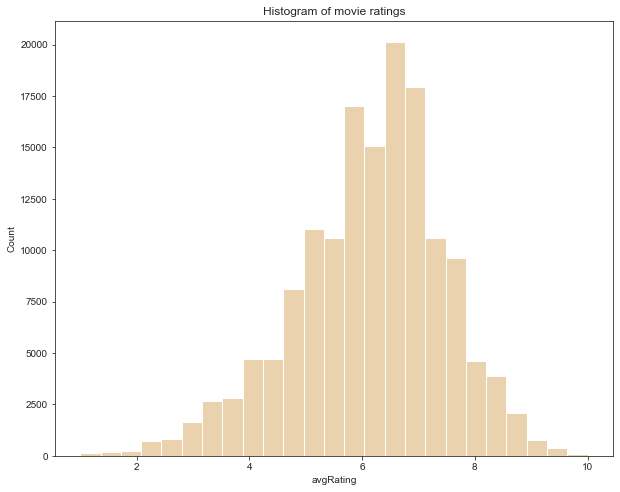

In [50]:
# Plot the histogram of movie ratings
plt.figure(figsize = (10, 8))
sns.histplot(data = movies_df, x = 'avgRating', bins = 25)
plt.title('Histogram of movie ratings')

In [51]:
movies_df['avgRating'].describe()

count    150457.000000
mean          6.121499
std           1.324762
min           1.000000
25%           5.300000
50%           6.200000
75%           7.000000
max          10.000000
Name: avgRating, dtype: float64

The distribution of the average ratings is slightly left skewed with a minimum rating of 1.0 and maximum rating of 10.0.

Text(0.5, 1.0, 'Histogram of votes')

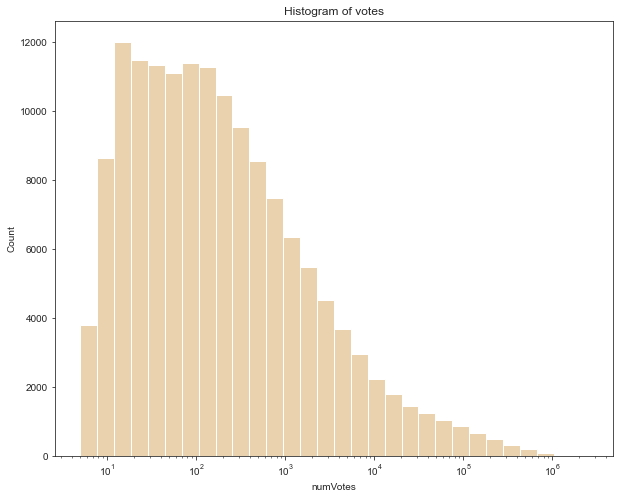

In [52]:
# Plot the histogram of votes
plt.figure(figsize = (10, 8))
sns.histplot(data = movies_df, x = 'numVotes', log_scale = True, bins = 30)
plt.title('Histogram of votes')

In [53]:
movies_df[ movies_df['numVotes'] >= 100000 ]

,movieID,primaryTitle,originalTitle,isAdult,year,runtime,genres,isOriginalTitle,avgRating,numVotes,director
1173,tt0012349,The Kid,The Kid,0,1921,68,"Comedy,Drama,Family",0,8.3,121259,Charles Chaplin
1866,tt0015864,The Gold Rush,The Gold Rush,0,1925,95,"Adventure,Comedy,Drama",0,8.2,107350,Charles Chaplin
2226,tt0017136,Metropolis,Metropolis,0,1927,153,"Drama,Sci-Fi",0,8.3,168170,Fritz Lang
3837,tt0021749,City Lights,City Lights,0,1931,87,"Comedy,Drama,Romance",0,8.5,177550,Charles Chaplin
4006,tt0022100,M,M - Eine Stadt sucht einen Mörder,0,1931,117,"Crime,Mystery,Thriller",0,8.3,151969,Fritz Lang
...,...,...,...,...,...,...,...,...,...,...,...
149342,tt9495224,Black Mirror: Bandersnatch,Black Mirror: Bandersnatch,0,2018,90,"Drama,Fantasy,Mystery",0,7.1,120869,David Slade
149629,tt9620292,Promising Young Woman,Promising Young Woman,0,2020,113,"Crime,Drama,Mystery",0,7.5,140588,Emerald Fennell
150075,tt9770150,Nomadland,Nomadland,0,2020,107,Drama,0,7.4,134995,Chloé Zhao
150088,tt9777666,The Tomorrow War,The Tomorrow War,0,2021,138,"Action,Adventure,Drama",0,6.6,178597,Chris McKay


In [54]:
movies_df['numVotes'].describe()

count    1.504570e+05
mean     6.077976e+03
std      4.436470e+04
min      5.000000e+00
25%      3.000000e+01
50%      1.310000e+02
75%      7.350000e+02
max      2.498691e+06
Name: numVotes, dtype: float64

The distribution of number of votes is extremely right skewed with a minimum number of votes of 5 and a maximum of 2498691. Majority of movies received lesser than 735 votes.

In [55]:
movies_df[ movies_df['year'].isnull() ]

,movieID,primaryTitle,originalTitle,isAdult,year,runtime,genres,isOriginalTitle,avgRating,numVotes,director
27657,tt0073399,Atlantic City Jackpot,The Money,0,NaN,88,"Action,Drama",0,5.6,57,Chuck Workman
55390,tt0203086,Home-Coming in Granddaughter: The Cultural Com...,San Jie Cao,0,NaN,58,Documentary,0,7.4,6,Bibo Liang
79073,tt10172414,You Don't Know Nicotine,You Don't Know Nicotine,0,NaN,NaN,Documentary,0,8.6,32,Aaron Biebert
80211,tt10425364,Samhain,Samhain,0,NaN,78,"Comedy,Horror",0,2.2,6,Gabriele Rolland
88879,tt12792418,Night in Paradise,Night in Paradise,0,NaN,131,"Action,Crime,Drama",0,6.7,5680,Park Hoon-jung
111274,tt2368535,As Words Breathe,A Breath to Survive,0,NaN,80,Drama,0,7.9,19,Jon Brekke
139366,tt6745192,Cool as Hell 2,Cool as Hell 2,0,NaN,90,Comedy,0,6.2,20,James Balsamo
149227,tt9440664,Patriot Acts,Patriot Acts,0,NaN,66,Documentary,0,3.8,5,James Lilly


In [58]:
movies_df['isOriginalTitle'].value_counts()

0    150451
1         6
Name: isOriginalTitle, dtype: int64

In [59]:
movies_df[ movies_df['isOriginalTitle'] == 1 ]

,movieID,primaryTitle,originalTitle,isAdult,year,runtime,genres,isOriginalTitle,avgRating,numVotes,director
71183,tt0442567,Guns Before Butter,Guns Before Butter,0,2005,83,"Comedy,Thriller",1,5.6,22,Jordan Ellis
89191,tt1288367,We Will Rock You,Operation Belvis Bash,0,2011,85,"Comedy,Music,Romance",1,6.4,1045,Alex Lvovsky
94033,tt1430116,Hellgate,Hellgate,0,2011,93,"Drama,Fantasy,Horror",1,4.5,799,John Penney
122071,tt3665498,Beyond the Sky,Beyond the Sky,0,2018,82,"Mystery,Sci-Fi,Thriller",1,5.2,4384,Fulvio Sestito
131414,tt5215088,A.I. Rising,A.I. Rising,0,2018,85,"Drama,Romance,Sci-Fi",1,5.2,13527,Lazar Bodroza
145445,tt8273104,Captive,Captive,0,2020,90,Thriller,1,6.0,1195,Savvas Christou


In [61]:
# Drop all null years
movies_df = movies_df.dropna(subset = ['year'])
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150449 entries, 0 to 150456
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movieID          150449 non-null  object 
 1   primaryTitle     150449 non-null  object 
 2   originalTitle    150449 non-null  object 
 3   isAdult          150449 non-null  int64  
 4   year             150449 non-null  object 
 5   runtime          142164 non-null  object 
 6   genres           148010 non-null  object 
 7   isOriginalTitle  150449 non-null  int64  
 8   avgRating        150449 non-null  float64
 9   numVotes         150449 non-null  int64  
 10  director         148878 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 13.8+ MB


In [74]:
# Convert year to type int
movies_df['year'] = movies_df['year'].astype(int)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150449 entries, 0 to 150456
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movieID          150449 non-null  object 
 1   primaryTitle     150449 non-null  object 
 2   originalTitle    150449 non-null  object 
 3   isAdult          150449 non-null  int64  
 4   year             150449 non-null  int64  
 5   runtime          142164 non-null  object 
 6   genres           148010 non-null  object 
 7   isOriginalTitle  150449 non-null  int64  
 8   avgRating        150449 non-null  float64
 9   numVotes         150449 non-null  int64  
 10  director         148878 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 13.8+ MB


In [83]:
movies_df['year'].describe()

count    150449.000000
mean       1993.772548
std          27.069907
min        1897.000000
25%        1978.000000
50%        2006.000000
75%        2015.000000
max        2021.000000
Name: year, dtype: float64

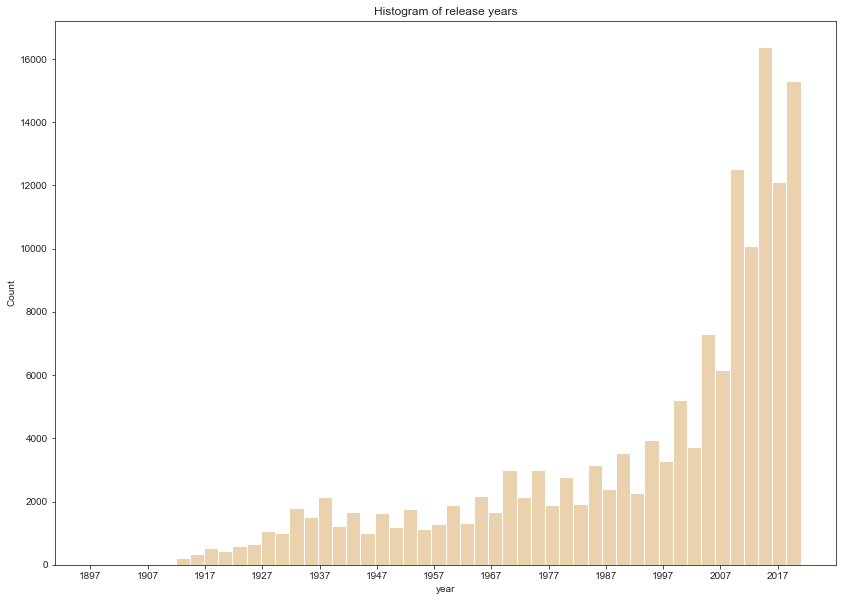

In [86]:
# Plot the histogram of movie release years
plt.figure(figsize = (14, 10))
sns.histplot(data = movies_df, x = 'year', bins = 50)
plt.title('Histogram of release years')
#plt.xticks(rotation = 90)
plt.xticks( np.arange(min(movies_df['year']), max(movies_df['year']), 10) )
plt.show()

It seems that majority of movies in the movies_df data were released after 2006.

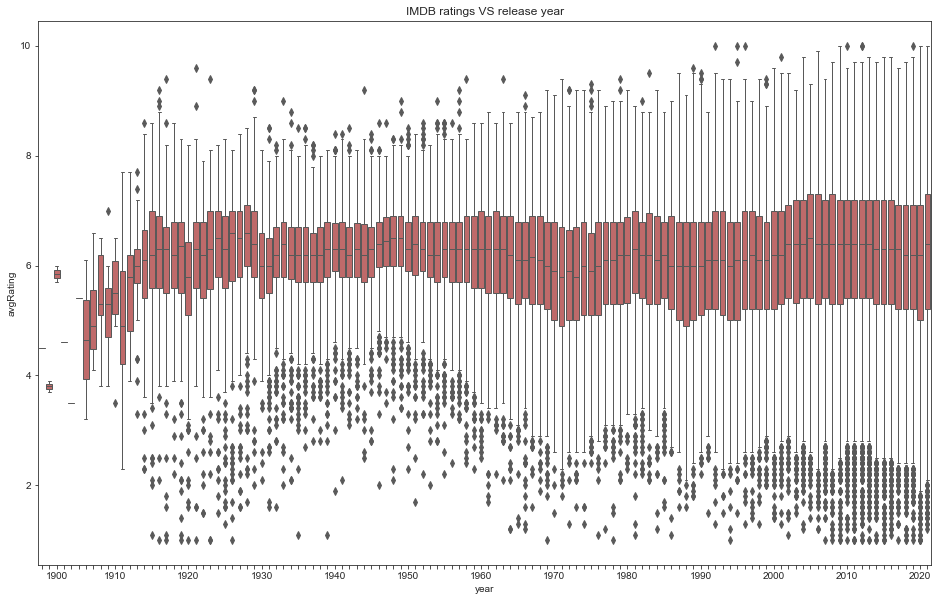

In [108]:
# Boxplot of IMDB ratings VS release year
plt.figure(figsize = (16, 10))
plot_ = sns.boxplot(data = movies_df, x = 'year', y = 'avgRating', orient = 'v', color = 'indianred', linewidth = 1)
plt.title("IMDB ratings VS release year")
for label in plot_.get_xticklabels():
    if int(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

We can say that the average IMBD ratings for movies after 1910 remained more or less the same, but recently there has been a significant amount of movies both with high and low scores.

In [138]:
# Top 30 most number of votes
d = movies_df.sort_values(by = ['numVotes'], ascending = False)[:30]
d

,movieID,primaryTitle,originalTitle,isAdult,year,runtime,genres,isOriginalTitle,avgRating,numVotes,director
40799,tt0111161,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,0,9.3,2498691,Frank Darabont
72745,tt0468569,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",0,9.0,2449059,Christopher Nolan
92529,tt1375666,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",0,8.8,2197578,Christopher Nolan
47077,tt0137523,Fight Club,Fight Club,0,1999,139,Drama,0,8.8,1965977,David Fincher
40343,tt0109830,Forrest Gump,Forrest Gump,0,1994,142,"Drama,Romance",0,8.8,1928912,Robert Zemeckis
40704,tt0110912,Pulp Fiction,Pulp Fiction,0,1994,154,"Crime,Drama",0,8.9,1928900,Quentin Tarantino
46346,tt0133093,The Matrix,The Matrix,0,1999,136,"Action,Sci-Fi",0,8.7,1782238,Lilly Wachowski
44084,tt0120737,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,178,"Action,Adventure,Drama",0,8.8,1748182,Peter Jackson
50808,tt0167260,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,201,"Action,Adventure,Drama",0,8.9,1726892,Peter Jackson
25743,tt0068646,The Godfather,The Godfather,0,1972,175,"Crime,Drama",0,9.2,1722880,Francis Ford Coppola


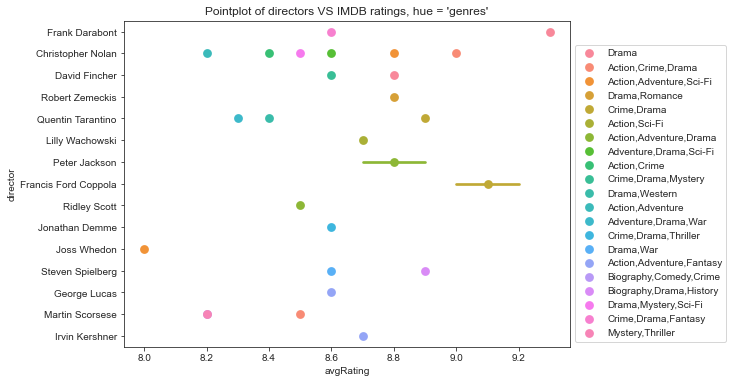

In [152]:
# Pointplot of directors VS IMDB ratings, hue = 'genres'
plt.figure(figsize = (8, 6))
sns.pointplot(data = d, x = 'avgRating', y = 'director', hue = 'genres')
plt.title("Pointplot of directors VS IMDB ratings, hue = 'genres'")
plt.legend(loc = 'lower left', bbox_to_anchor = (1, 0))

It appears that 6 Christopher Nolan films are within the top 30 most number of votes.

In [168]:
top30_genres = {}
for g in d['genres'].str.split(','):
    for i in range(0, len(g)):
        if g[i] not in top30_genres:
            top30_genres[g[i]] = 1
        else:
            top30_genres[g[i]] += 1
top30_genres

{'Drama': 21,
 'Action': 13,
 'Crime': 10,
 'Adventure': 11,
 'Sci-Fi': 5,
 'Romance': 1,
 'Mystery': 3,
 'Western': 1,
 'War': 2,
 'Thriller': 2,
 'Fantasy': 3,
 'Biography': 2,
 'Comedy': 1,
 'History': 1}

In [169]:
# How about top 30 highest IMDB ratings AND most number of votes?
d2 = movies_df.sort_values(by = ['avgRating', 'numVotes'], ascending = False)[:30]
d2

,movieID,primaryTitle,originalTitle,isAdult,year,runtime,genres,isOriginalTitle,avgRating,numVotes,director
97713,tt15736370,Jai Bhajrangi,Jai Bhajrangi,0,2021,NaN,"Action,Fantasy",0,10.0,511,Harsha
92710,tt1381658,Queer Icon: The Cult of Bette Davis,Queer Icon: The Cult of Bette Davis,0,2009,88,Documentary,0,10.0,220,M. Black
149880,tt9691482,Kaye Ballard - The Show Goes On,Kaye Ballard - The Show Goes On,0,2019,90,Biography,0,10.0,201,Dan Wingate
96717,tt1532296,Wild Horses and Renegades,Wild Horses and Renegades,0,2010,78,"Documentary,Western",0,10.0,198,James Kleinert
82894,tt11076052,Electric Burma,Electric Burma,0,2012,54,Documentary,0,10.0,183,Natalie Johns
49803,tt0160316,Girls Loving Girls,Girls Loving Girls,1,1996,60,Adult,0,10.0,14,NaN
98613,tt16252560,Capitol Punishment,Capitol Punishment,0,2021,139,Documentary,0,10.0,13,Christopher Burgard
95690,tt14941184,Minnesota! The Modern Day Selma,Minnesota! The Modern Day Selma,0,2021,106,Documentary,0,10.0,10,Michael Douglas Carlin
90026,tt13129430,Pulling Power from the Sky: The Story of Makani,Pulling Power from the Sky: The Story of Makani,0,2020,110,Documentary,0,10.0,8,Kate Stirr
126919,tt4428002,I Chose Life: Stories of Suicide and Survival,I Chose Life: Stories of Suicide and Survival,0,2020,100,Documentary,0,10.0,8,Jacqui Blue


It is clear that the top 30 IMDB movies based on ratings received far less number of votes. However, looking at the release years, these top 30 movies were mostly released quite recently. Perhaps after a few more years the average ratings will change.

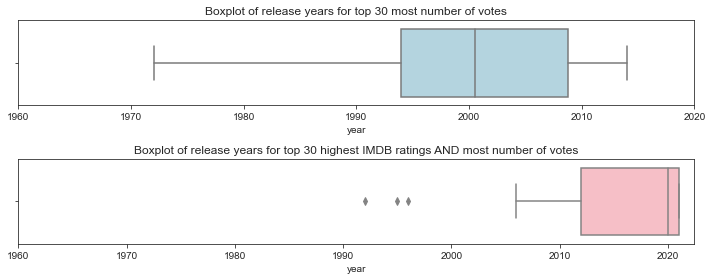

In [182]:
plt.figure(figsize = (10, 4))
plt.subplot(2, 1, 1)
sns.boxplot(data = d, x = 'year', color = 'lightblue')
plt.title('Boxplot of release years for top 30 most number of votes')
plt.xticks( np.arange(1960, max(movies_df['year']), 10) )
plt.subplot(2, 1, 2)
sns.boxplot(data = d2, x = 'year', color = 'lightpink')
plt.title('Boxplot of release years for top 30 highest IMDB ratings AND most number of votes')
plt.xticks( np.arange(1960, max(movies_df['year']), 10) )
plt.tight_layout()
plt.show()

In [192]:
top30_genres2 = {}
temp = d2[ ~d2['genres'].isnull() ]
for g in temp['genres'].str.split(','):
    for i in range(0, len(g)):
        if g[i] not in top30_genres2:
            top30_genres2[g[i]] = 1
        else:
            top30_genres2[g[i]] += 1
top30_genres2

{'Action': 2,
 'Fantasy': 1,
 'Documentary': 14,
 'Biography': 2,
 'Western': 1,
 'Adult': 1,
 'Horror': 1,
 'Drama': 8,
 'Musical': 1,
 'Comedy': 2,
 'Family': 1,
 'Romance': 1}

Documentary is the most popular genre for the top 30 highest IMDB ratings AND most number of votes, whereas drama is the most popular genre for the top 30 most number of votes alone.

In [194]:
# How about the most popular genre overall?
genres_dict = {}
temp = movies_df[ ~movies_df['genres'].isnull() ]
for g in temp['genres'].str.split(','):
    for i in range(0, len(g)):
        if g[i] not in genres_dict:
            genres_dict[g[i]] = 1
        else:
            genres_dict[g[i]] += 1
genres_dict

{'Action': 17547,
 'Adventure': 11494,
 'Biography': 5215,
 'Drama': 66894,
 'Fantasy': 5211,
 'Family': 5506,
 'War': 3408,
 'History': 4448,
 'Documentary': 21693,
 'Romance': 17365,
 'Western': 4474,
 'Crime': 15280,
 'Mystery': 7247,
 'Horror': 14780,
 'Thriller': 15488,
 'Comedy': 37839,
 'Music': 4022,
 'Sport': 2214,
 'Sci-Fi': 5117,
 'Animation': 3174,
 'Musical': 2669,
 'Film-Noir': 759,
 'News': 444,
 'Adult': 3290,
 'Short': 15,
 'Talk-Show': 7,
 'Reality-TV': 24,
 'Game-Show': 1}

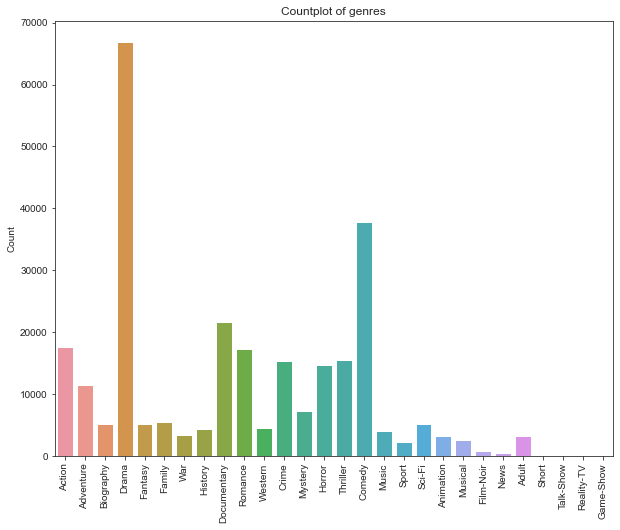

In [201]:
keys = list(genres_dict.keys())
vals = [int(genres_dict[k]) for k in keys]
plt.figure(figsize = (10, 8))
sns.barplot(x = keys, y = vals)
plt.title('Countplot of genres')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Summary
* The cleaned dataset `my_df.csv` consists of only US movies with IMDB ratings recorded
* Most movies have an IMDB rating of 6.2 to 7.0
* Most movies received between 100 to 1000 votes, with a minimum and maximum of 5 and 2498691 votes respectively
* Most movies were released after 2006
* The average IMDB ratings for movies after 1910 hovered around a low 6.0, but recently the range of scores were larger
* Christopher Nolan has six films within the top 30 most number of votes, followed by three films from a different director
* IMDB ratings of 10.0 received only a maximum of 511 votes
* Movies with extremely high ratings were mostly recent releases
* Drama is the most popular genre, followed by comedy